<a href="https://colab.research.google.com/github/teodorachiriac73/PMP-2024/blob/main/partial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

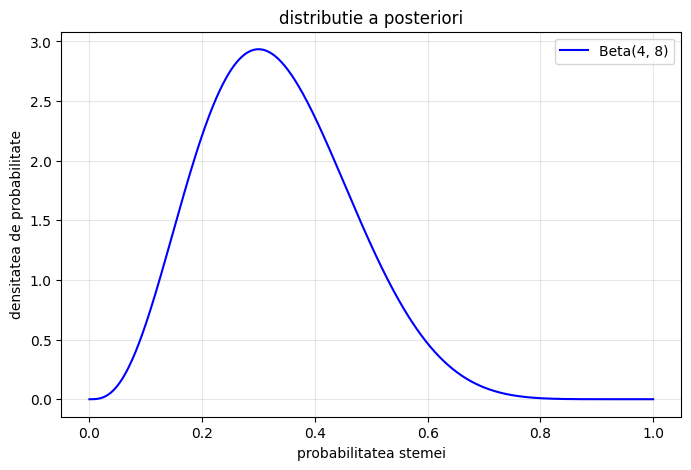

In [3]:
# problema 3 a)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

alpha_prior = 1
beta_prior = 1
observations= ['s','b','b','b','s','b','s','b','b','b']

successes = 3
failures = 7

alpha_posterior = alpha_prior + successes
beta_posterior = beta_prior + failures

p = np.linspace(0, 1, 500)

posterior_pdf = beta.pdf(p, alpha_posterior, beta_posterior)

plt.figure(figsize=(8, 5))
plt.plot(p, posterior_pdf, label=f'Beta({alpha_posterior}, {beta_posterior})', color='blue')
plt.title("distributie a posteriori")
plt.xlabel("probabilitatea stemei")
plt.ylabel("densitatea de probabilitate")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


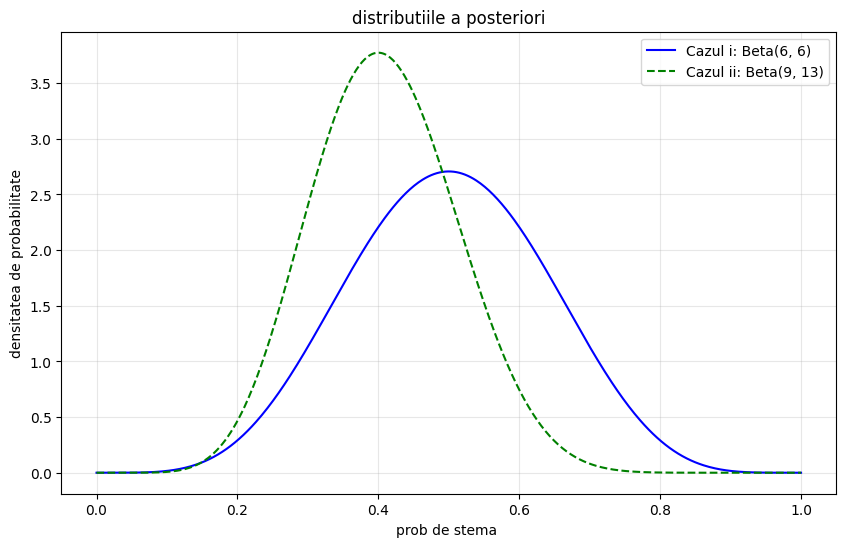

In [9]:
# problema 3 b)

observations=['s',' s','b','s','b','b','s','b',' b','s']

successes_new = 5
failures_new = 5

alpha_prior_i = 1
beta_prior_i = 1

alpha_posterior_i = alpha_prior_i + successes_new
beta_posterior_i = beta_prior_i + failures_new

alpha_prior_ii = 4
beta_prior_ii = 8

alpha_posterior_ii = alpha_prior_ii + successes_new
beta_posterior_ii = beta_prior_ii + failures_new

p = np.linspace(0, 1, 500)

posterior_pdf_i = beta.pdf(p, alpha_posterior_i, beta_posterior_i)
posterior_pdf_ii = beta.pdf(p, alpha_posterior_ii, beta_posterior_ii)

plt.figure(figsize=(10, 6))
plt.plot(p, posterior_pdf_i, label=f'Beta({alpha_posterior_i}, {beta_posterior_i})', color='blue')
plt.plot(p, posterior_pdf_ii, label=f'Beta({alpha_posterior_ii}, {beta_posterior_ii})', color='green')
plt.title("distributiile a posteriori")
plt.xlabel("prob de stema ")
plt.ylabel("densitatea de probabilitate")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [1]:
!apt install libgraphviz-dev
!pip install pygraphviz
!pip install networkx
!pip install pgmpy

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 49 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgail18 amd64 2.24.33-2ubuntu2.1 [15.9 kB]
Get:4 http://archive.ubun